# Solve the heat equation using FFT

See lecture from Oct 27.  Find $u: [0,1]×[0,T]→R$ such that 

$$\frac{\partial u}{\partial t}(x,t)− \frac{\partial^2 u}{\partial x^2}(x,t) = 0 $$

$$∀x∈[0,1] ∀t∈[0,T]$$ 

$$ u(x,0) =u_0(x)$$ $$∀x∈[0,1]$$

with u periodic in x.

Try $u_0=χ[0.3,0.7]$ and $u_0= max{0,1−10|x−0.5|}$. 

Plot u(x,t= 0.01),u(x,t= 0.1), and u(x,t= 1).
Be careful to choose Fourier indices in $[−n/2,n/2)$.

Voluntary:  Solve the wave equation, same $u_0$, and $v_0=0$.

### Differentiation using FFT:

$$ f(x) = \sum_{j=0}^{n-1} \hat f_j e^{\frac{2 \pi i j x}{n}} $$

$\hat f_j$ are constant, differenting only the exponential part

$$ f'(x) = \sum_{j=0}^{n-1} \hat f_j \frac{2 \pi i j}{n} e^{\frac{2 \pi i j x}{n}} $$

### Heat EQ:
Models the heat distribution over time. One easy way to solve the DEQ is to use FFT.

$$\frac{\partial u}{\partial t}(x,t)− \frac{\partial^2 u}{\partial x^2}(x,t) = 0 $$

Only Fourier-transforming the spatial dimension:

$$ FFT\left(\frac{\partial u}{\partial t}\right) - FFT(u'') = 0$$
$$ \frac{\partial}{\partial t} \hat u_j - \left(\frac{2 \pi i j}{n}\right)^2 \hat u_j = 0$$
$$ \frac{\partial}{\partial t} \hat u_j + \left(\frac{2 \pi j}{n}\right)^2 \hat u_j = 0$$

= ODE
Ansatz $\hat u_j = e^{\lambda t}$
$$\hat u_j = e^{-\frac{2 \pi j}{n}^2 t}$$

Inital condition $\hat u_j(0) = FFT(u_0) =: \hat u_{o, j} $
$$\hat u_j =\hat u_{o, j} *  e^{-\frac{2 \pi j}{n}^2 t}$$

Solution:
$$ u(t) = FFT^{-1}(\hat u(t)) $$

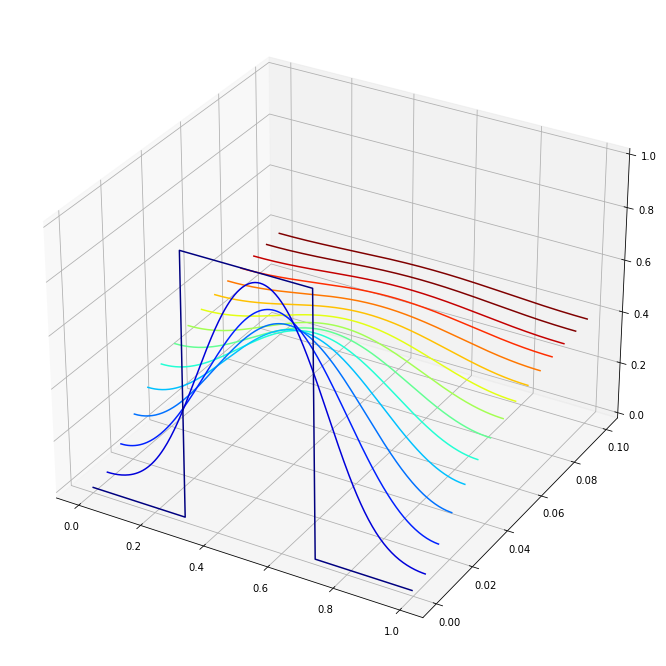

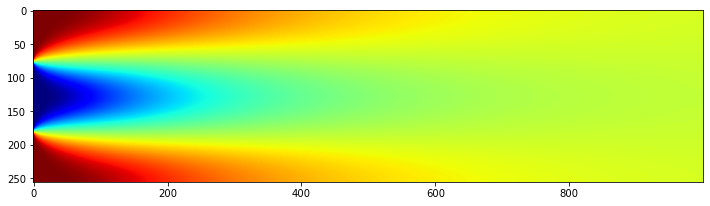

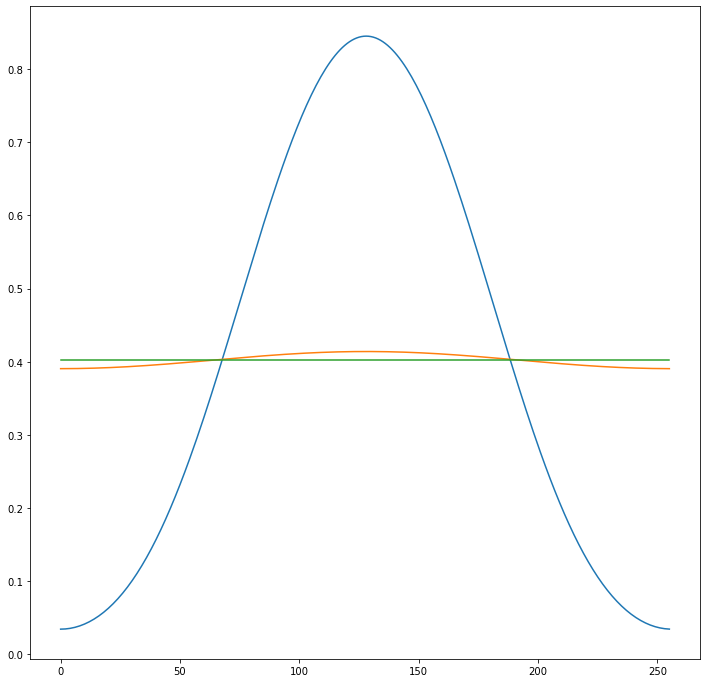

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import matplotlib.cm as cm

L = 1     # length of spatial domain
N = 2**8  # Number of discretization points
dx = L/N  # Step length in spatial domain
x = np.arange(0, L, dx)  # Define x domain
j = np.arange(-N/2, N/2)  # Fourier indices

# Inital condition:
u0 = np.logical_and(x>0.3, x<0.7) * 1.0  # define the temperature values for x at t=0
u0_hat = np.fft.fft(u0)
u0_hat = np.fft.fftshift(u0_hat)

t_max = 0.1
t_list = np.linspace(0, t_max, 15)

u_t = np.empty((N, t_list.size))
for idx, t in enumerate(t_list):
    uj_hat = np.exp(-((2*np.pi*j))**2 *t) * u0_hat
    u = sp.fft.ifft(np.fft.ifftshift(uj_hat))
    u_t[:, idx] = u.real  

# Waterfall plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection="3d")
plt.set_cmap("jet_r")
for idx, t in reversed(list(enumerate(t_list))):
    ys = t * np.ones(x.size)
    ax.plot(x, ys, u_t[:, idx], color=cm.jet(idx * 20))
    
# image plot
t_list = np.linspace(0, t_max, 1000)
u_t = np.empty((N, t_list.size))
for idx, t in enumerate(t_list):
    uj_hat = np.exp(-((2*np.pi*j))**2*t) * u0_hat
    u = sp.fft.ifft(np.fft.ifftshift(uj_hat))
    u_t[:, idx] = u.real
    
plt.figure(figsize=(12, 12))
plt.imshow(u_t)
    
# plot t=0.01, 0.1, 1
t_list = [0.01, 0.1, 1]
plt.figure(figsize=(12, 12))
for idx, t in enumerate(t_list):
    uj_hat = np.exp(-(2*np.pi*j)**2*t) * u0_hat
    u = sp.fft.ifft(np.fft.ifftshift(uj_hat))
    plt.plot(u.real)

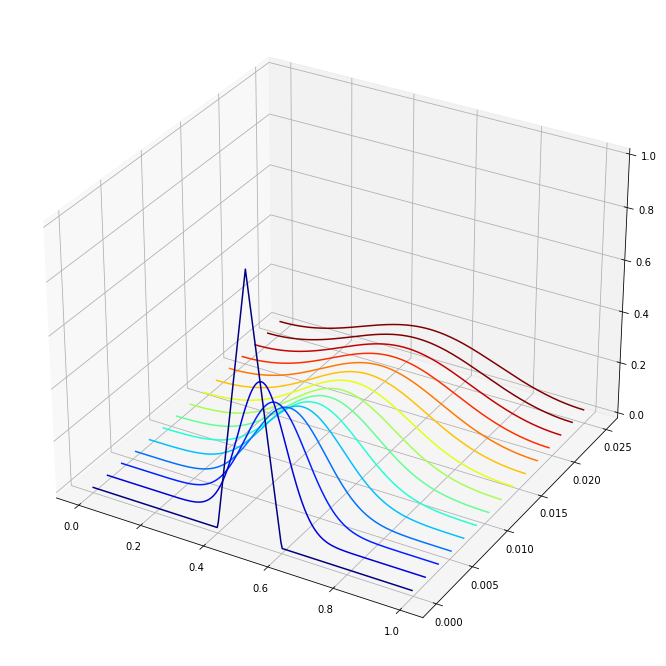

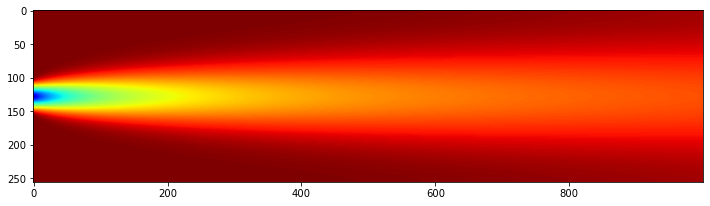

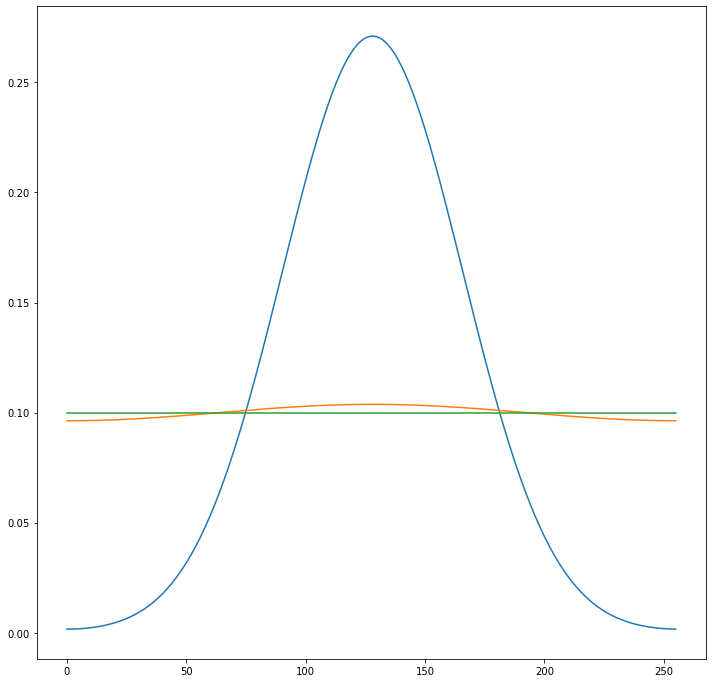

In [120]:
# Inital condition:
u0 = 1 -10 * np.abs(x-0.5)
u0[u0<0] = 0
u0_hat = np.fft.fft(u0)
u0_hat = np.fft.fftshift(u0_hat)

t_max = 0.025
t_list = np.linspace(0, t_max, 15)

u_t = np.empty((N, t_list.size))
for idx, t in enumerate(t_list):
    uj_hat = np.exp(-(2*np.pi*j)**2*t) * u0_hat
    u = sp.fft.ifft(np.fft.ifftshift(uj_hat))
    u_t[:, idx] = u.real  

# Waterfall plot
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection="3d")
plt.set_cmap("jet_r")
for idx, t in reversed(list(enumerate(t_list))):
    ys = t * np.ones(x.size)
    ax.plot(x, ys, u_t[:, idx], color=cm.jet(idx * 20))
    
# image plot
t_list = np.linspace(0, t_max, 1000)
u_t = np.empty((N, t_list.size))
for idx, t in enumerate(t_list):
    uj_hat = np.exp(-(2*np.pi*j)**2*t) * u0_hat
    u = sp.fft.ifft(np.fft.ifftshift(uj_hat))
    u_t[:, idx] = u.real
    
plt.figure(figsize=(12, 12))
plt.imshow(u_t)
    
# plot t=0.01, 0.1, 1
t_list = [0.01, 0.1, 1]
plt.figure(figsize=(12, 12))
for idx, t in enumerate(t_list):
    uj_hat = np.exp(-(2*np.pi*j)**2*t) * u0_hat
    u = sp.fft.ifft(np.fft.ifftshift(uj_hat))
    plt.plot(u.real)